In [24]:
# imports

# linalg
import math
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)
%matplotlib inline

# pre-processing
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # train test split

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# supervised algorithms
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.linear_model import RANSACRegressor # linear regression
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

# unsupervised algorithms
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch

# artificial/simulated data
from sklearn.datasets import make_blobs

# metrics
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# misc
import sys,os
from IPython.display import Image, display

# to show images
def show_image(fn, width=500):
    fp1 = os.path.join('./diagrams/', fn)
    display(Image(filename=fp1, width=width))


In [2]:
# versions
print(f"np: {np.__version__}")
print(f"pd: {pd.__version__}")
print(f"sns: {sns.__version__}")
print(f"py: {sys.version_info[0:3]}") # sys.version

np: 1.17.3
pd: 0.25.2
sns: 0.9.0
py: (3, 7, 3)


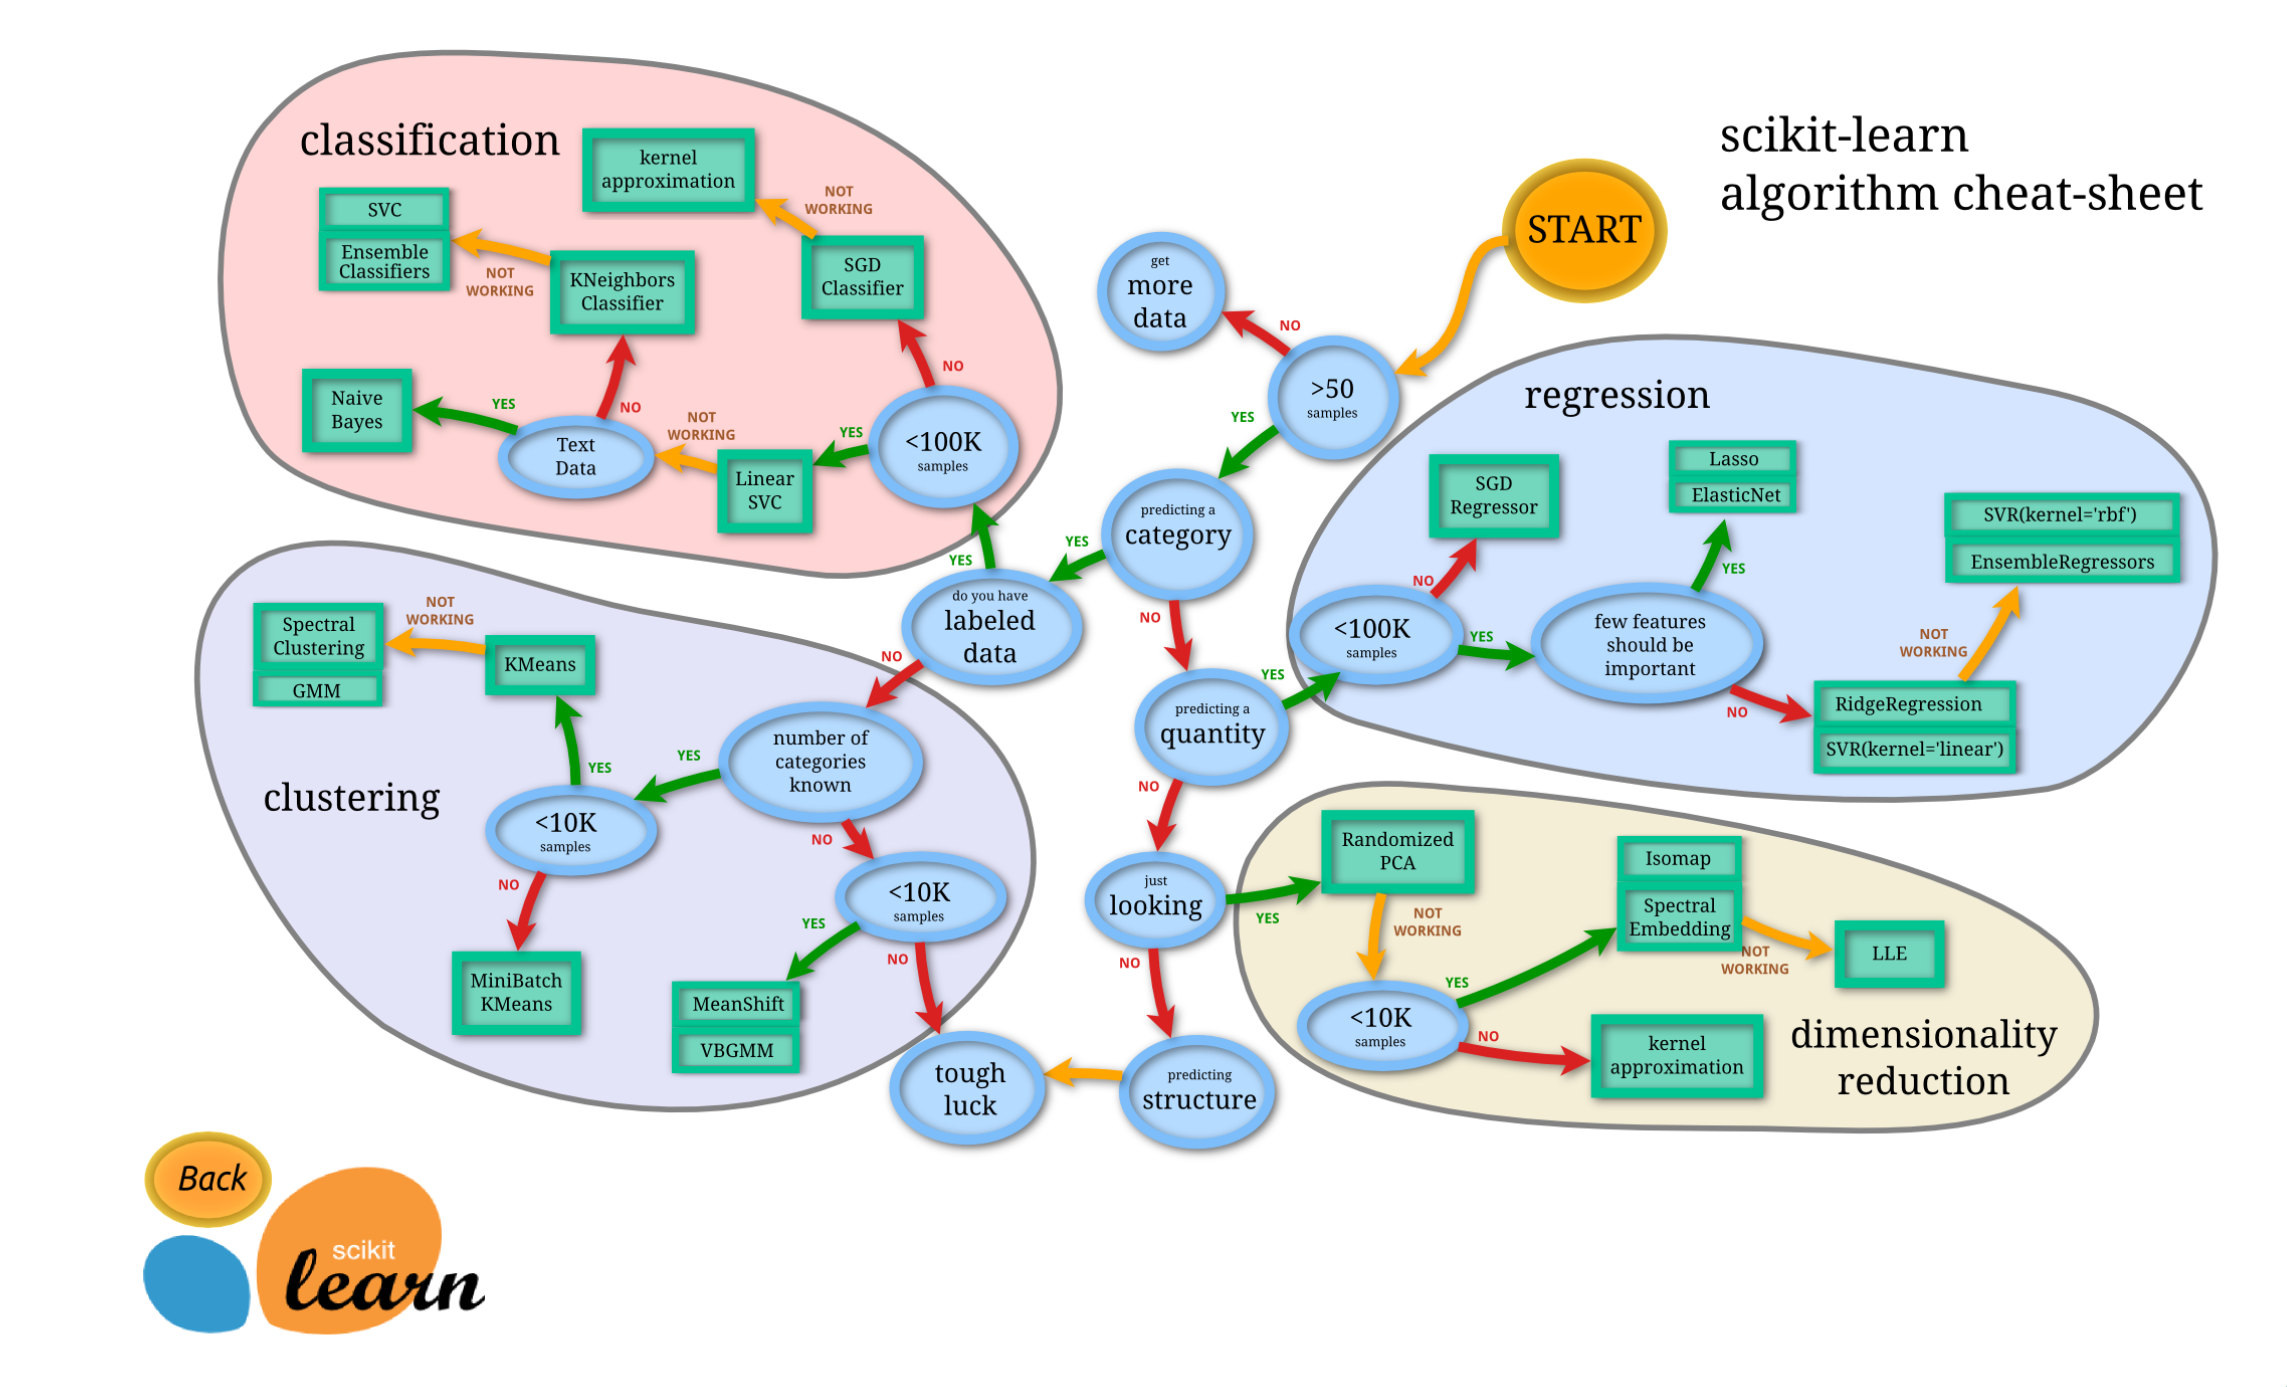

In [3]:
# algorithms
show_image(fn='algorithm-flow.png', width=1000)

In [ ]:
# using sklearn models
    # choose a model
    # set hyperparameters
    # arrange data into features (matrix) and target (vector)
    # train/test split
    # fit model to data
    # evaluate model by using it on test (unseen) data

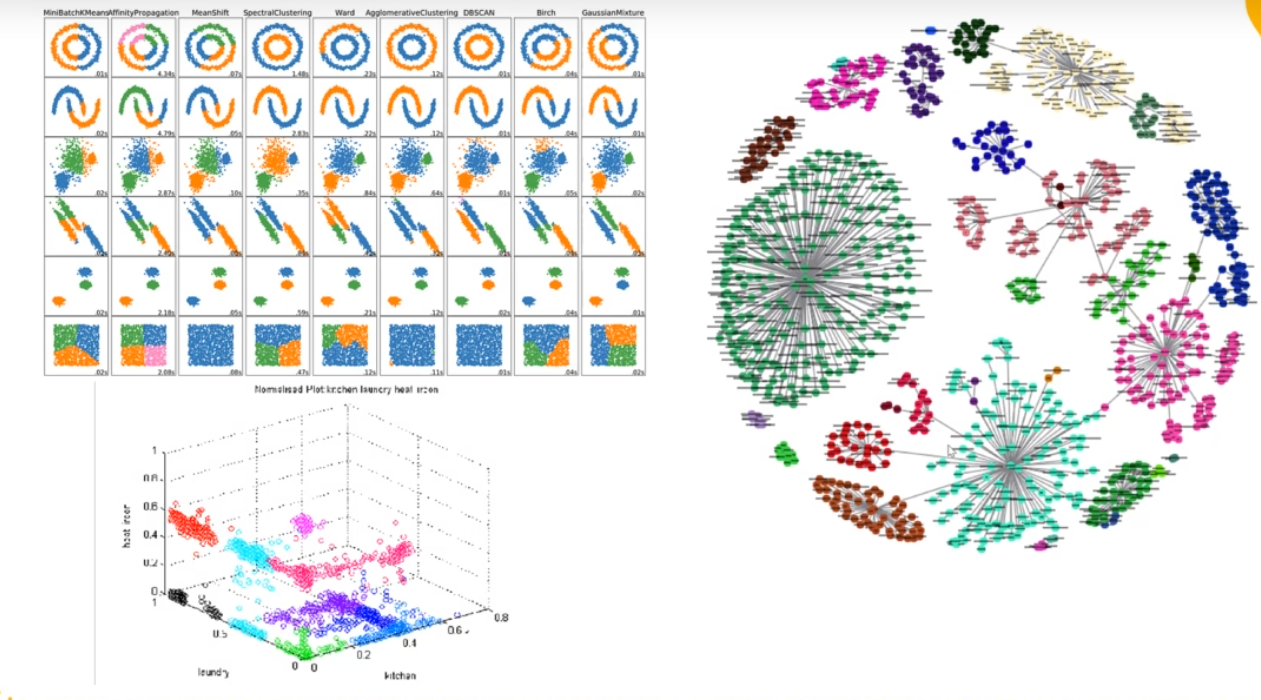

In [4]:
# unsupervised learning
    # ML without labels (historical data)
    # clustering -- cluster data together into similar groups
    # data scientists must interpret clusters
    
# sklearn
    # https://scikit-learn.org/stable/modules/clustering.html

show_image(fn='unsupervised-learning.png')

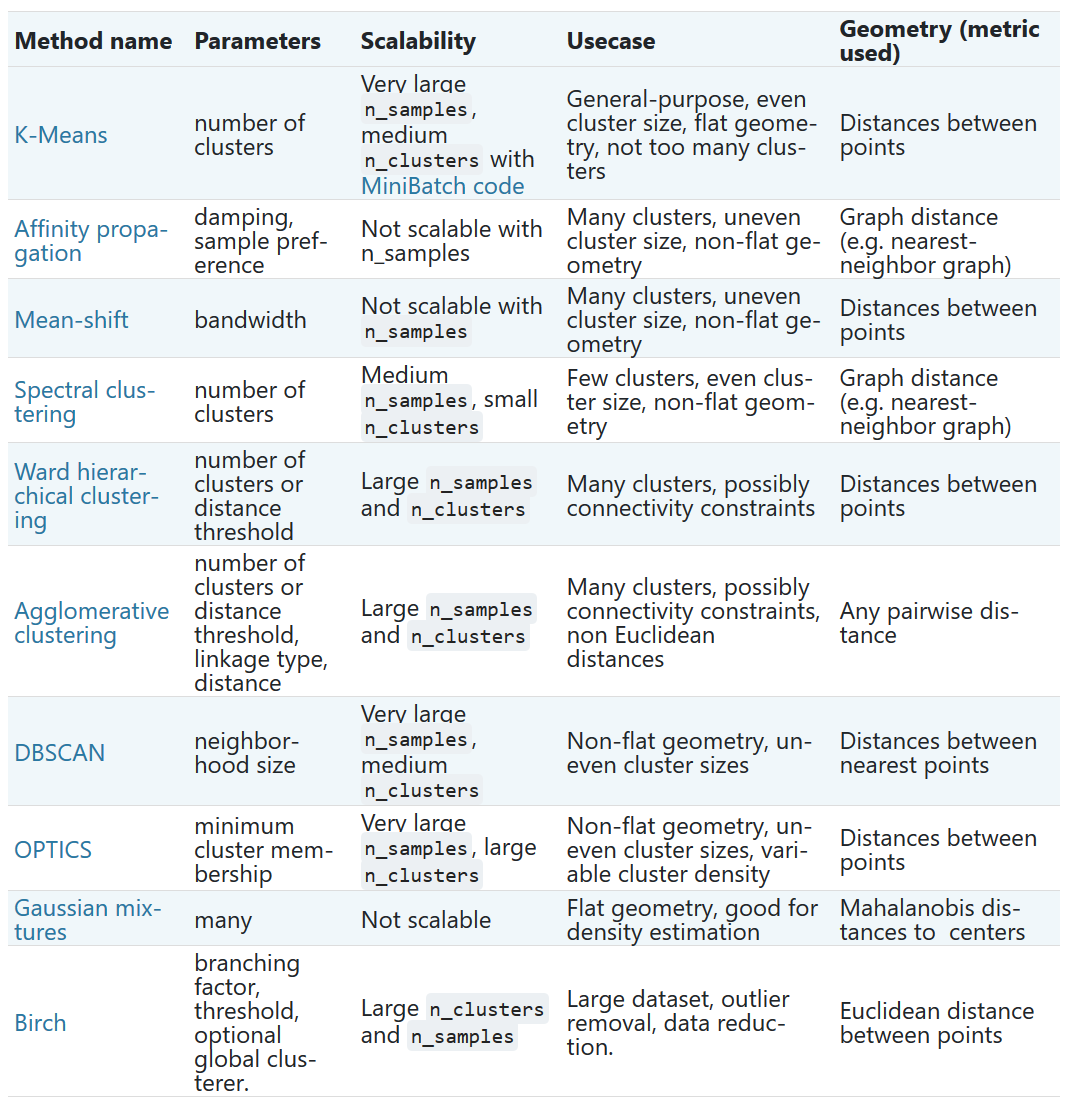

In [5]:
# unsupervised learning (sklearn reference)

show_image(fn='unsupervised-sklearn.png')

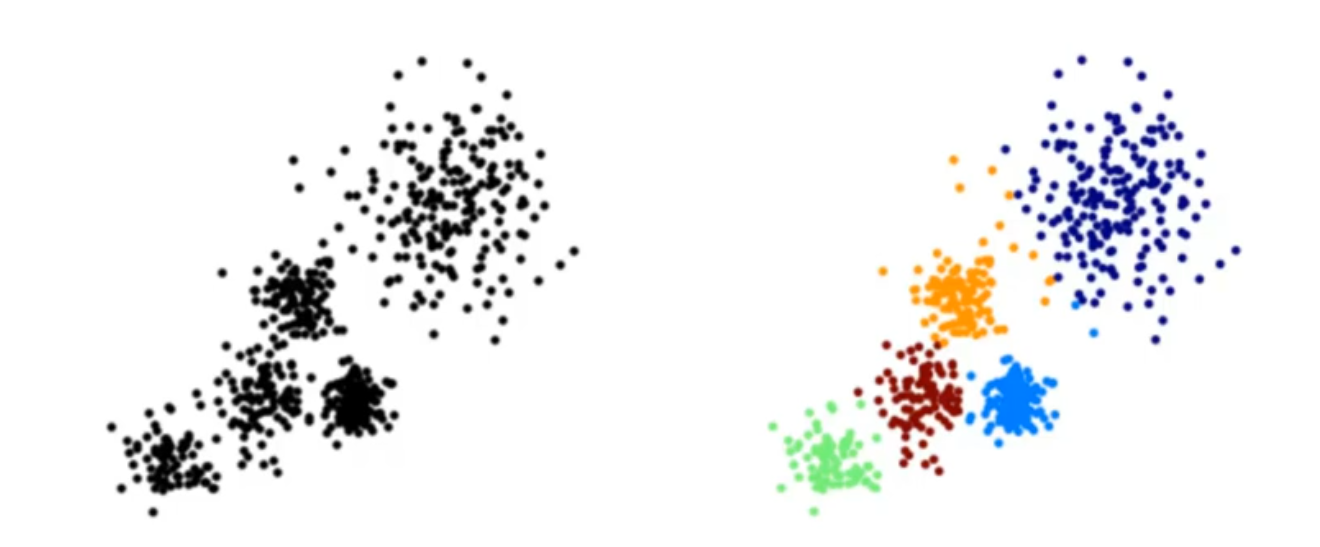

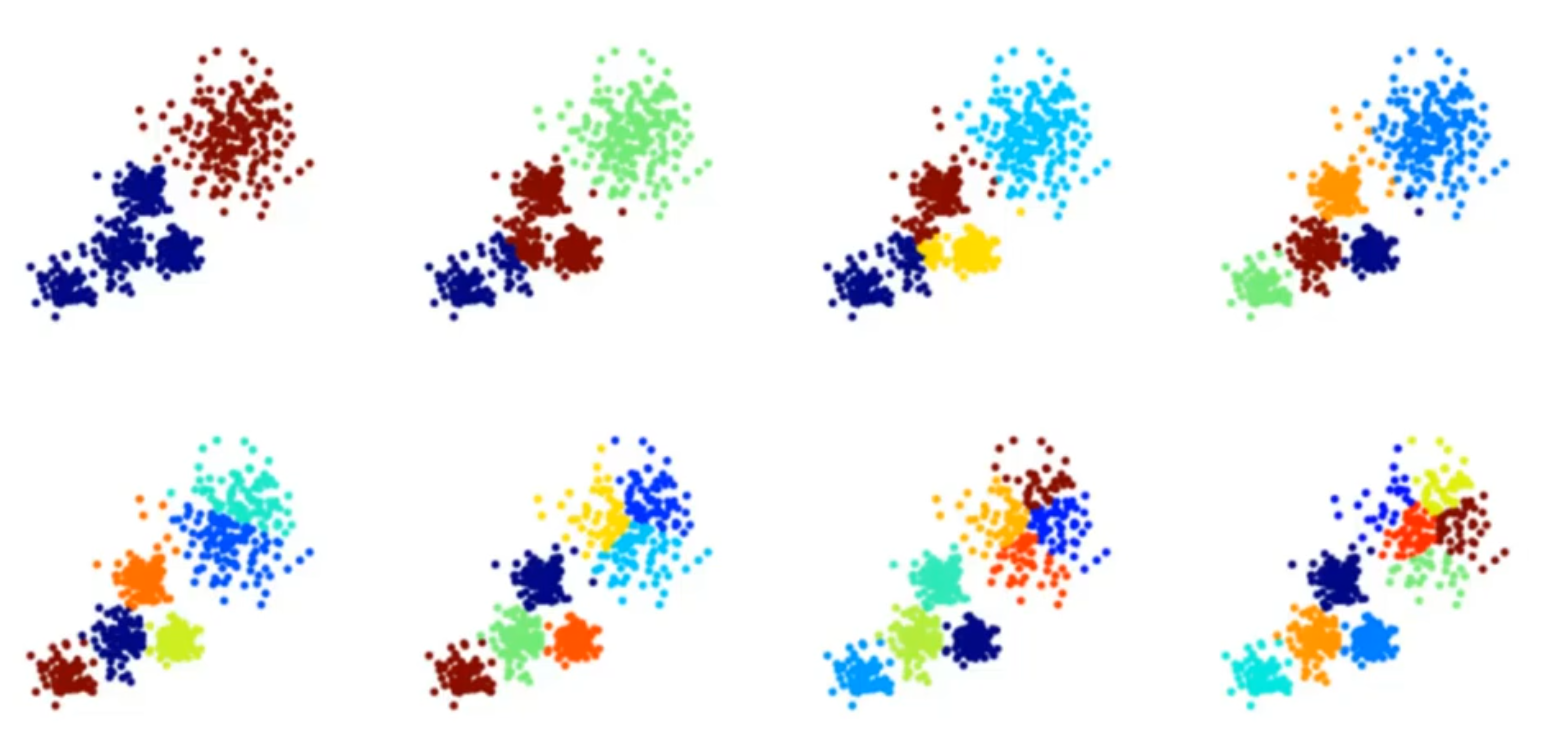

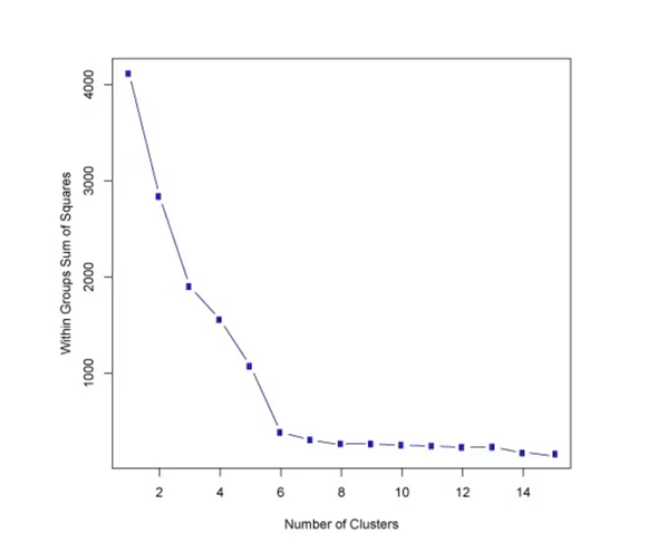

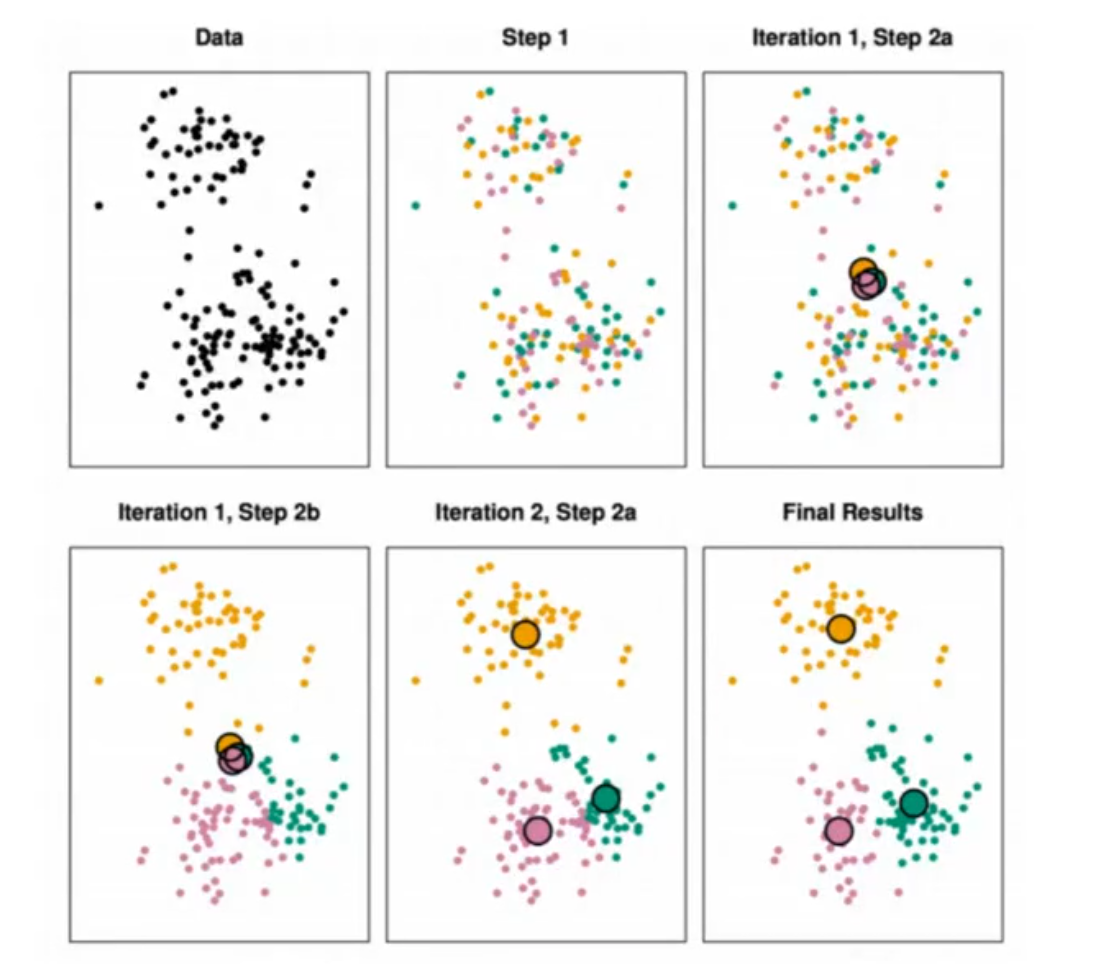

In [6]:
# k means clustering
    # unsupervised learning technique
    # group similar records/observations
    # process
        # choose a number of clusters
        # randomly assign each point to a cluster
        # until clusters stop changing:
            # for each cluster, compute cluster centroid (mean vector of points in cluster)
            # assign each data point to the cluster for which the centroid is the closest
    # elbow method
        # inertia -- within-cluster sum-of-squares distances from centroid
            # compute sum of squared error (SSE) for different values of k
        # SSE is defined as the sum of the squared distance between each cluster member and its centroid
        # choose a k value where SSE decreases abruptly (elbow effect)
    # silhouette analysis
        # method that validates consistency within clusters of data
        # how close a point is to another cluster
        # calculate silhouette coefficient
            # mean distance of a point to:
                # all other points in its own cluster
                # all points in nearest neighbor cluster
            # s(i) = ( b(i) - a(i) ) / max( a(i), b(i) )
            # silhouette_coef = (mean_dist_neighbor - mean_dist_own) / max(mean_dist_neighbor, mean_dist_own)
        # interpret silhouette coefficient
            # 1 -- far away from other clusters
            # 0 -- near or intersecting with another cluster
        # best result -- more clusters, higher silhouette score
    # weaknesses
        # works on convex/isotropic clusters (round blobs), NOT anisotropic (not-round blobs)
        # k is manually chosen
        # sensitive to outliers
        # problems when clustering varying sizes/densities
        # doesn't scale well with large numbers of dimensions (PCA mitigates this)
        # doesn't work well on categorical values (especially un-ordered) (ie -- fruits)
            # alternatives -- k-medians, k-modes
        
    
    
show_image(fn='k-means-clustering.png')
show_image(fn='k-means-clustering-kvalue.png')
show_image(fn='k-means-clustering-elbow.png')
show_image(fn='k-means-clustering2.png')

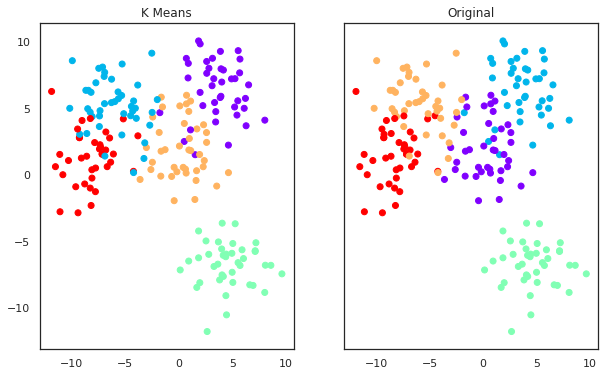

In [7]:
# k means clustering
    # example -- 4 features, 5 groups/centers
    # you might not know how many groups/centers

# simulated data
data = make_blobs(n_samples=200, n_features=4, centers=5, cluster_std=2.0, random_state=101)
# split
X = pd.DataFrame(data[0])
y = data[1] # normally you wouldn't have this
# model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# model details
kmeans.cluster_centers_
kmeans.labels_

# check
    # plots show first feature column plotted against second feature column (there are 4 features)
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=y, cmap='rainbow')

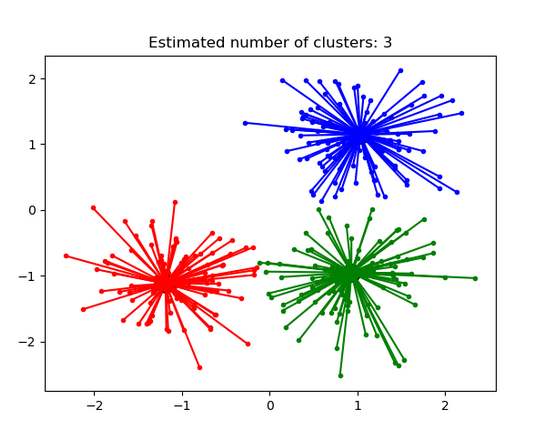

In [8]:
# affinity propagation
    # unsupervised
    # send suitability messages between pairs until convergence
    # weaknesses
        # time complexity -- does not scale well to large number of samples
        
show_image(fn='affinity-propagation.png')

In [10]:
# affinity propagation

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# model
model_ap = AffinityPropagation()
model_ap.fit(X)
# labels
model_ap.labels_
model_ap.cluster_centers_
# predict
model_ap.predict([[0,0],[4,4]])



array([0, 1])

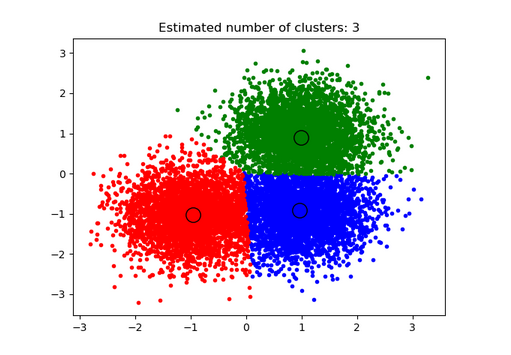

In [11]:
# mean shift
    # unsupervised
    # discover blobs in a smooth density of samples
    # uses centroids algorithm
        # centroids candidates are updated to be the mean of the points within a region
        # candidates (near-duplicates) are filtered during post-processing
    # weaknesses
        # not scalable
        # guaranteed to converge, will stop iterating when change in centroids is small
        
show_image(fn='mean-shift.png')

In [12]:
# mean shift

# data
X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
# model
    # automatically sets number of clusters
    # bandwith (optional)
        # set bandwith (dictates the size of the region to search through)
        # default -- estimate_bandwidth
model_ms = MeanShift(
    bandwidth = 2 # optional
) 
model_ms.fit(X)
# labels
model_ms.labels_
# predict
model_ms.predict([[0, 0], [5, 5]])


array([1, 0])

In [20]:
# DBSCAN (density-based spatial clustering of applications with noise)
    # views clusters as areas of high density, separated by areas of low density
    # this allows for shape flexibility (doesn't have to be convex)
    # params
        # eps -- maximum allowable distance between samples for them to be in the same "neighborhood"
        # min_samples -- minimum number of samples in a neighborhood for a point to be considered a core point
    # interpret
        # positive integers -- labels
        # -1 -- noisy samples
        
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
# model
model_dbscan = DBSCAN(eps=3, min_samples=2)
model_dbscan.fit(X)
# labels
model_dbscan.labels_

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
# EM using GMM (expectation maximization clustering using Gaussian Mixture Models)
    # https://scikit-learn.org/stable/modules/mixture.html#mixture

In [15]:
# hierarchical clustering
    # builds nested clusters by merging/splitting them successively
    # hierarchy of clusters is represented as a tree (dendrogram)
    # agglomerativee clustering 
        # hierarchical clustering approach
        # each observation starts in its own cluster, then clusters are successively merged together
        # linkage criteria determines the metric used for the merge strategy
    # linkage
        # ward
            # minimizes the sum of squared differences within all clusters
            # similar to k-means but uses agglomerative hierarchical approach
        # maximum/complete linkage
        # average linkage
        # single linkage
    # use case: many clusters, possibly connectivity constraints
    # weaknesses
        # scalable up to large sample/cluster sizes
        
X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
# model
model_ward = AgglomerativeClustering(
    n_clusters=2,
    linkage="ward",
)
model_sc.fit(X)
# labels
model_sc.labels_


array([1, 1, 1, 0, 0, 0])

In [ ]:
# spectral clustering
    # unsupervised
    # use case: few clusters, even cluster size, non-flat geometry
    # weaknesses
        # scalable up to medium sample/cluster sizes
        
X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
# model
model_sc = SpectralClustering(
    n_clusters=2,
    assign_labels="discretize", # strategy used to assign labels in the embedding space
)
model_sc.fit(X)
# labels
model_sc.labels_

In [22]:
# birch

X = [[0, 1], [0.3, 1], [-0.3, 1], [0, -1], [0.3, -1], [-0.3, -1]]
# model
model_b = Birch(n_clusters=None)
model_b.fit(X)
# predict
model_b.predict(X)


array([0, 0, 0, 1, 1, 1])

In [ ]:
# dimensionality reduction algorithms
    # PCA (principal component analysis)
    # t-SNE (t-distributed stochastic neighbor embedding)
    
# vs
    # PCA is the defacto standard in dimensionality reduction.
    # PCA is a linear projection -- it is unable to capture non-linear dependencies
    # t-SNE is not limited to linear projections -- it is applicable to more datasets


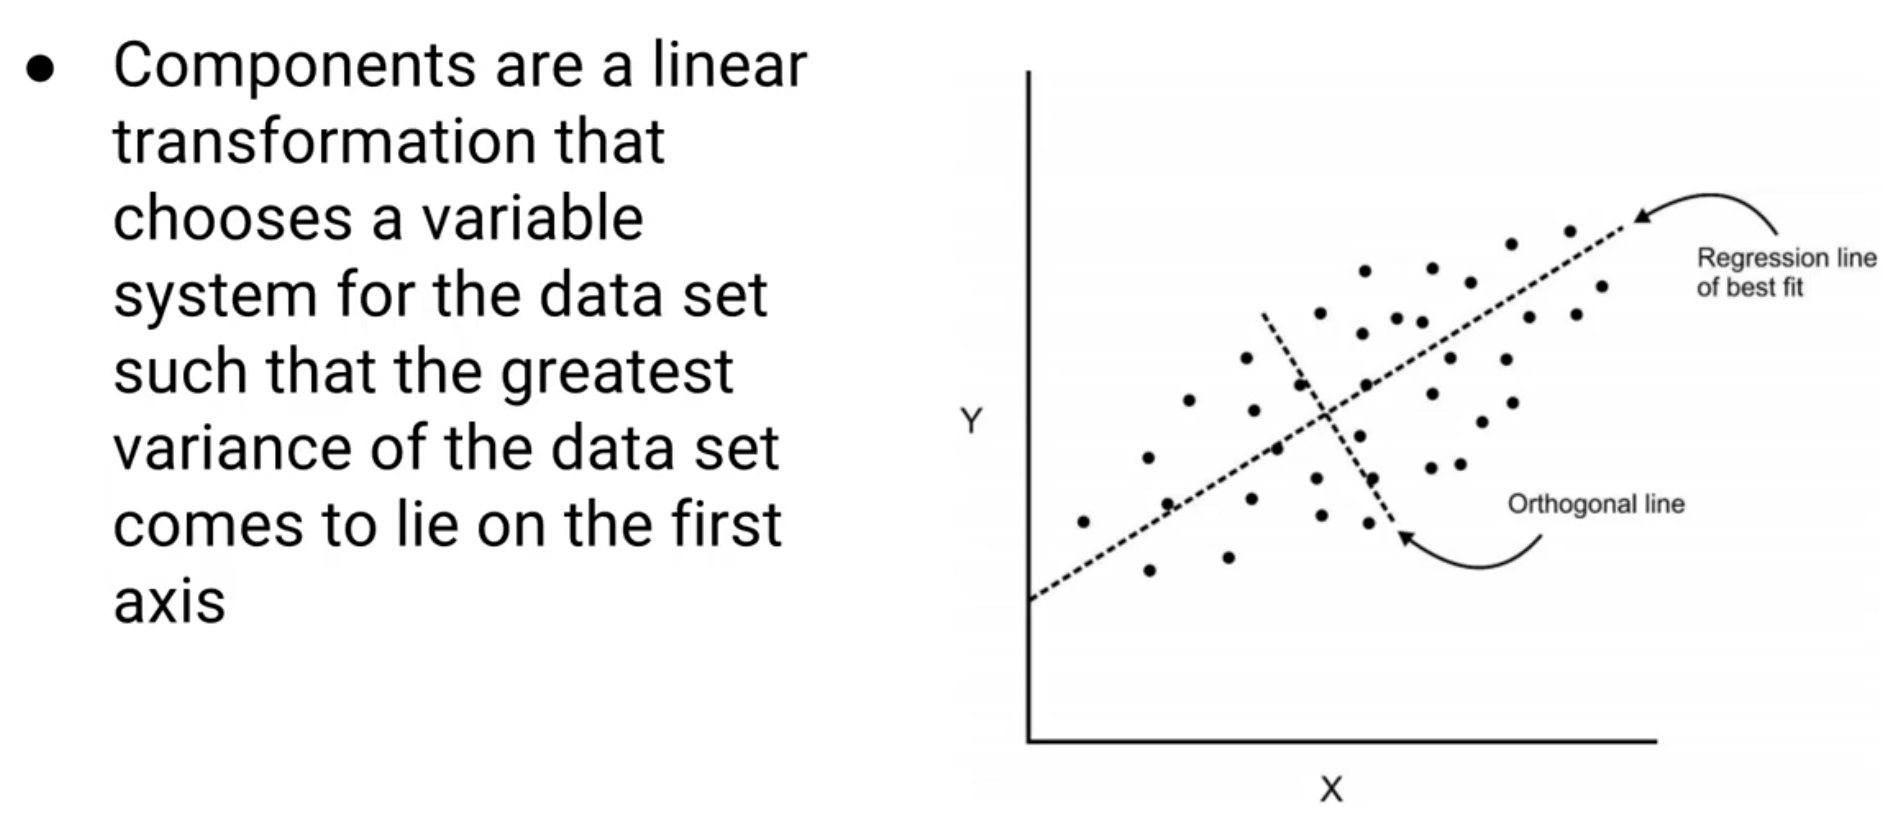

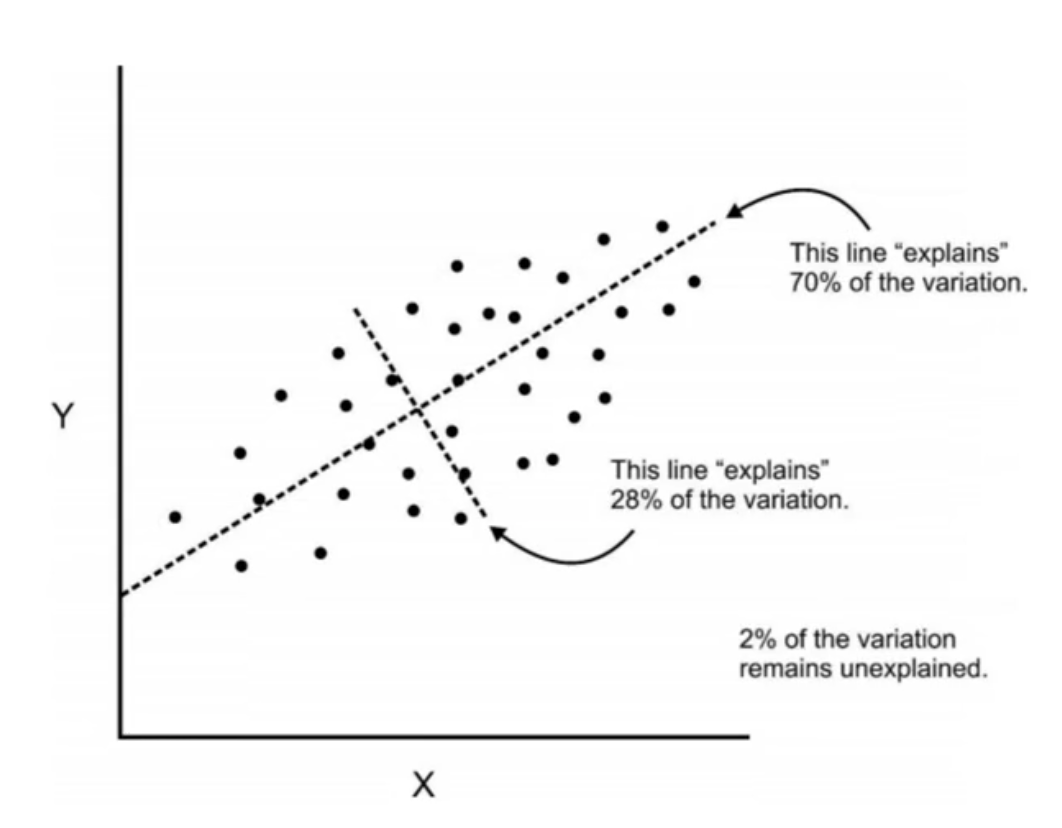

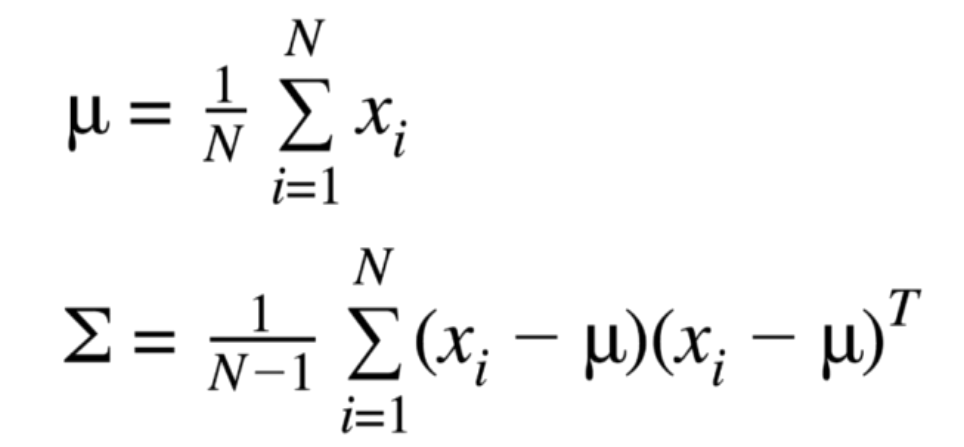

In [16]:
# PCA (principal component analysis)
    # PCA algorithm
        # higher -> lower dimensionality
        # reduction is based on eigenvectors
        # finds new set of dimensions where:
            # all dimensions are orthogonal (linearly independent)
            # dimensions are ranked according to the variance of its data
    # dimension reduction
        # reducing strongly correlated variables
        # this reduces computational expense
    # sometimes called 'factor analysis'
    # purpose
        # apply a transformation to the data (reduction)
        # explain which variables account for the most variance

# resources
    # https://medium.com/machine-learning-world/linear-algebra-svd-and-pca-5979f739e95a
    # https://medium.com/@falgunimukherjee/linear-algebra-for-machine-learning-part-6-dimensionality-reduction-and-pca-5811d42339ec
    # https://towardsdatascience.com/principal-component-analysis-math-and-intuition-post-2-1849090e6b7a
    # http://www.math.union.edu/~jaureguj/PCA.pdf
    # https://www.hackerearth.com/blog/developers/principal-component-analysis-with-linear-algebra/
    
# PCA process
    # *** normalize data before PCA ***
    # calculate covariance matrix
    # calculate eigenvalues/eigenvectors (SVD)
    # sort eigenvectors according to their eigenvalues (largest to smallest)
    # select a set of eigenvectors (k) to represent the data (in k-dimensions)
    # transform original n-dimensional dataset into k-dimensions

show_image(fn='pca.png')
show_image(fn='pca2.png')
show_image(fn='covariance-matrix.png')

Text(0, 0.5, 'Second Principal Component')

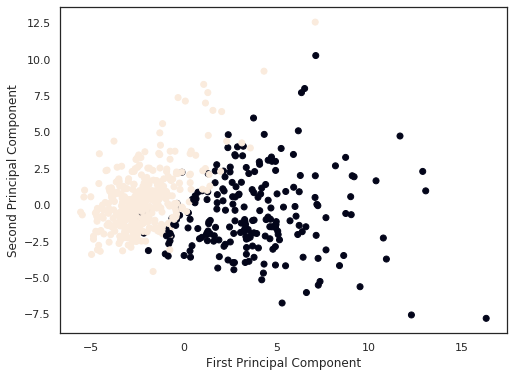

In [17]:
# pca

# data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

# scale
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

# pca
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data) # shape from (569, 30) to (569, 2)

# pca details
    # pca.components_
    # pca.explained_variance_
    # pca.singular_values_

# visualize
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


In [25]:
# t-SNE
    # t-SNE attemps to map points of higher dimension onto a lower dimensional (while preserving distances)
    # t-SNE uses stochastic neighbors
    
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

In [ ]:
# recommender systems
    # content-based RS -- focuses on attributes of items and gives recommendations based on similarity
    # collaborative filtering (CF) -- wisdom of the crowd (other users liked/bought this as well)
        # memory based CF -- uses cosine similarity
        # model based CF -- uses SVD